This part of the notebook is devoted to the analysis of Bayesian optimization of one-dimensional functions from a file Functions.py. For this work is used library GPyOpt. You can install it from a terminal : pip install gpyopt. I consider Bayesian optimization for two cases: optimizing the function without noise and optimizing the same function, but with noise that is dependent from the coordinate. And then I compare the results.


In [497]:
%pylab inline  
import GPy
import GPyOpt

import  Functions
from Functions import *


Populating the interactive namespace from numpy and matplotlib


func:  michalewicz
without noise


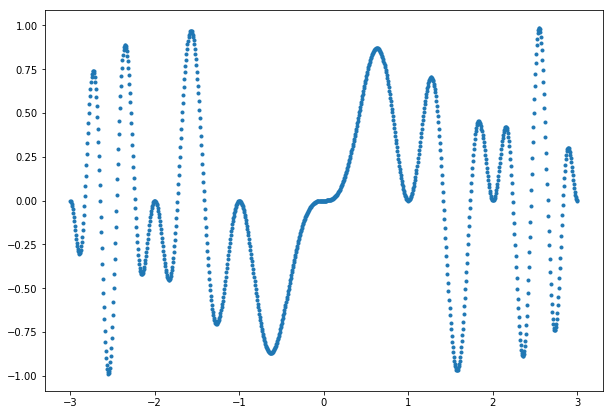

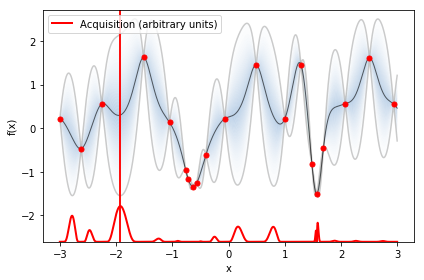

with noise


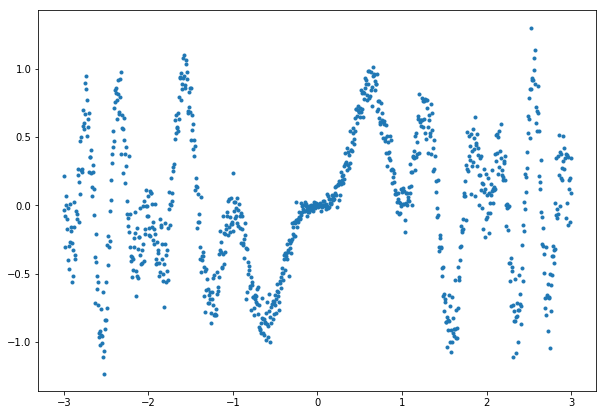

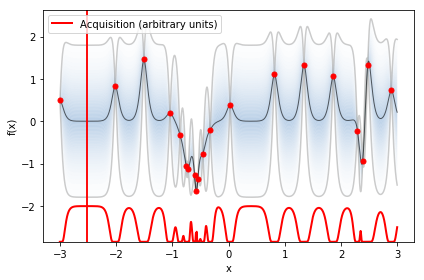

x_opt_without_noise =  [1.56723251] , x_opt_with_noise =  [-0.57307616] , diff =  [2.14030867]
y_opt_without_noise =  -0.9685418034598094 , y_opt_with_noise =  -1.0369084533571655 , diff =  0.06836664989735608
func:  ackley1
without noise


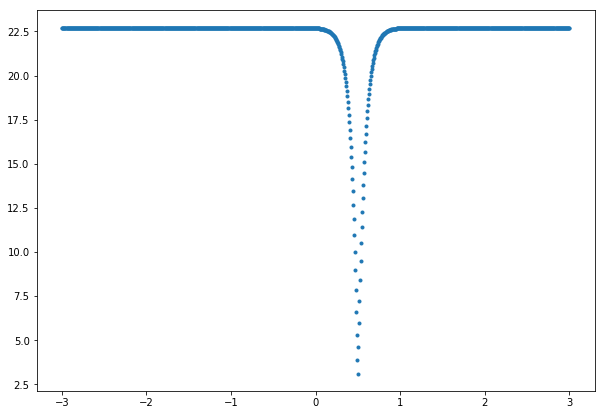

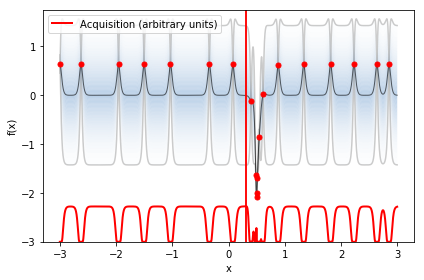

with noise


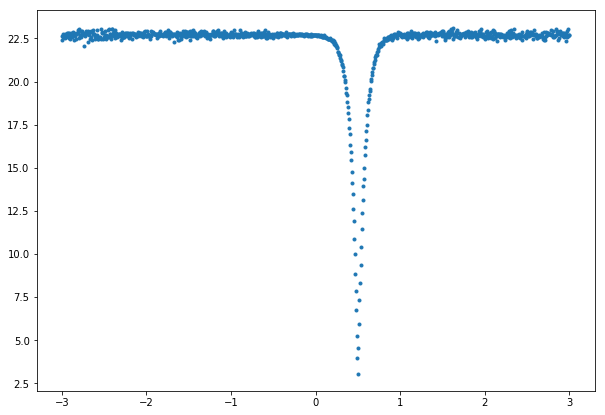

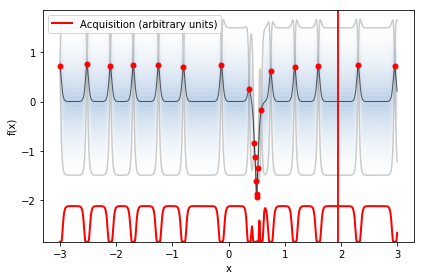

x_opt_without_noise =  [0.49860314] , x_opt_with_noise =  [0.4984041] , diff =  [0.00019904]
y_opt_without_noise =  3.0811286930392723 , y_opt_with_noise =  3.1826020524430683 , diff =  0.10147335940379598
func:  gsobol
without noise


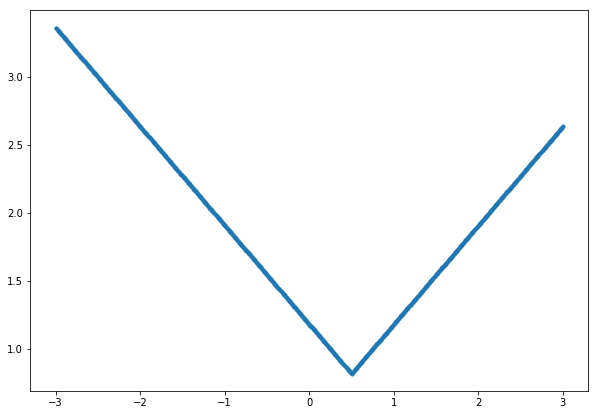

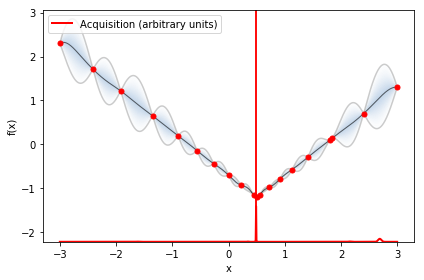

with noise


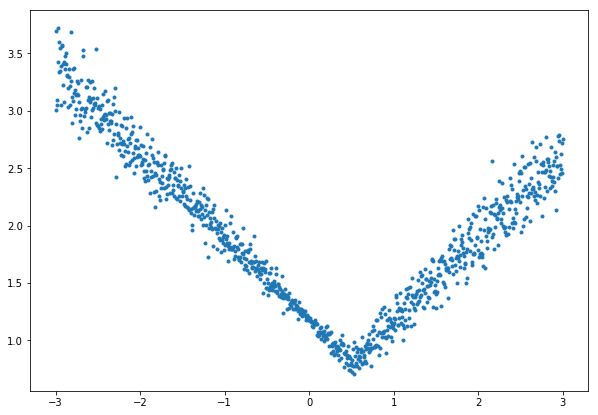

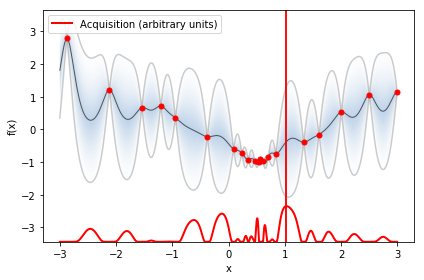

x_opt_without_noise =  [0.50449074] , x_opt_with_noise =  [0.54371974] , diff =  [0.039229]
y_opt_without_noise =  0.8214478123945216 , y_opt_with_noise =  0.8192449968715109 , diff =  0.002202815523010715
func:  michalewicz5
without noise


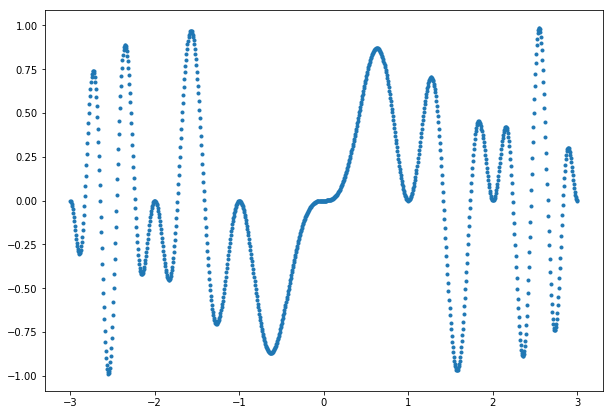

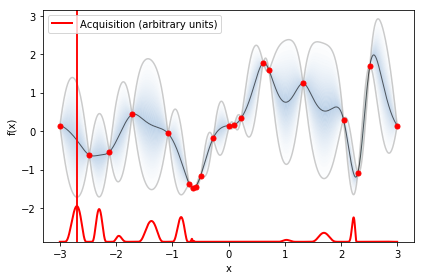

with noise


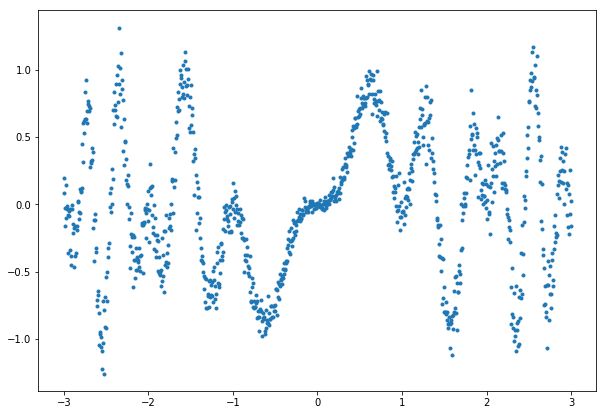

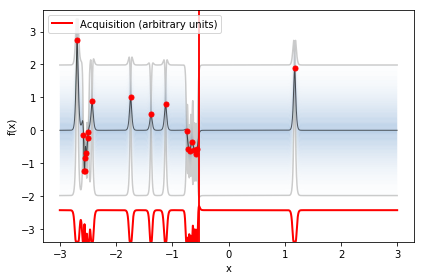

x_opt_without_noise =  [-0.6286613] , x_opt_with_noise =  [-2.55908201] , diff =  [1.93042071]
y_opt_without_noise =  -0.8700477308658338 , y_opt_with_noise =  -1.1535486957470364 , diff =  0.2835009648812027
func:  sqmichalewicz5
without noise


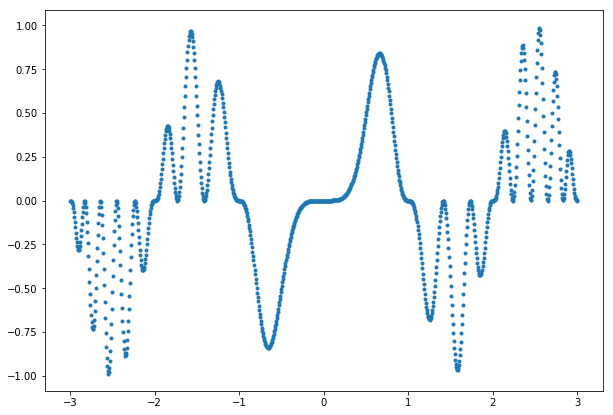

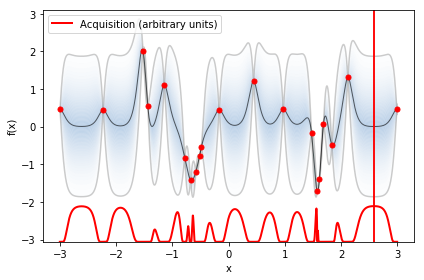

with noise


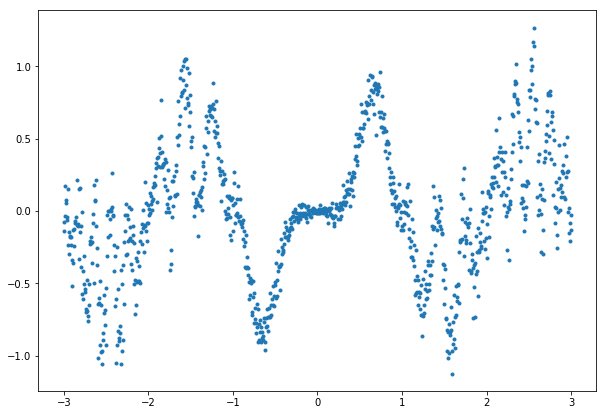

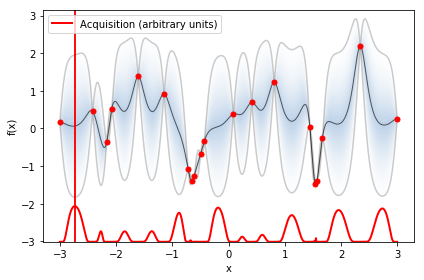

x_opt_without_noise =  [1.58110086] , x_opt_with_noise =  [1.54638641] , diff =  [0.03471445]
y_opt_without_noise =  -0.9677171517793268 , y_opt_with_noise =  -0.9790351381485225 , diff =  0.011317986369195676
func:  rosenbrock5
without noise


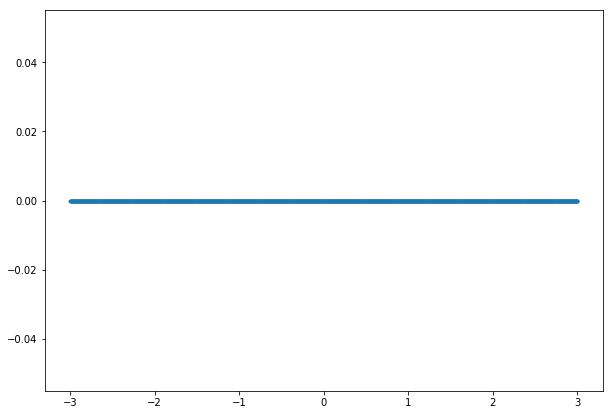

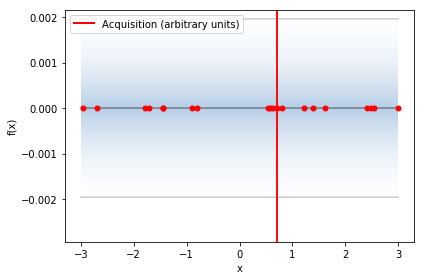

with noise


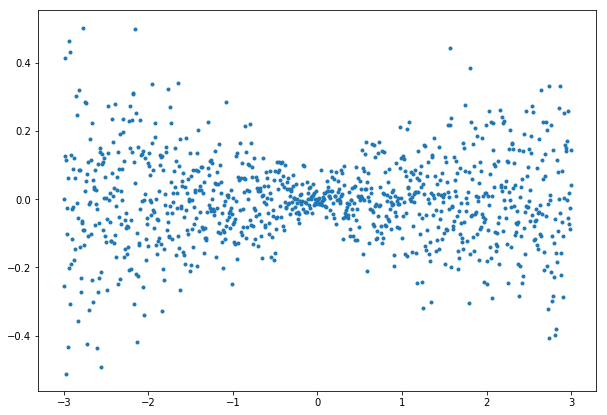

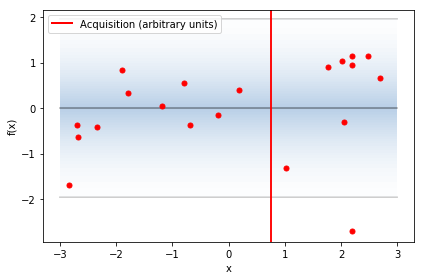

x_opt_without_noise =  [1.396213] , x_opt_with_noise =  [2.19113259] , diff =  [0.79491959]
y_opt_without_noise =  0.0 , y_opt_with_noise =  -0.3769902846215631 , diff =  0.3769902846215631


In [507]:
#list of one-dimensional functions from Functions.py
function_names = ['michalewicz', 'ackley1', 'gsobol', 'michalewicz5', 'sqmichalewicz5', 'rosenbrock5']

#required set of constants
N = 1000
X = np.linspace(-3, 3, N).reshape (- 1, 1)

bounds = [{'name': 'var_1', 'type': 'continuous', 'domain': (-3,3)}]  # problem constraints 

max_iter = 15 # evaluation budget
max_time = 60     # time budget 
eps      = 10e-6  # Minimum allows distance between the las two observations


for name in function_names:
    #first function - without noise    
    def f(X):
        return functionDoESpecial (X, name)
    print "func: ", name
    y = f(X)
    print 'without noise'
    pyplot.figure(figsize=(10, 7))
    pyplot.plot(X, y, '.')

    bayes_opt_without_noise = GPyOpt.methods.BayesianOptimization(f=f,# function to optimize       
                                                domain=bounds, # box-constraints of the problem
                                                acquisition_type='EI',
                                                 exact_feval = True) # Selects the Expected improvement

    bayes_opt_without_noise.run_optimization(max_iter, max_time, eps)        
    bayes_opt_without_noise.plot_acquisition()


    
    
    #second function - with noise   
    def f(X):
        # target function  + heteroscadastic noise
        return functionDoESpecial (X, name) + \
        0.1 * np.random.multivariate_normal(np.zeros(X.reshape(-1, ).shape[0]), np.diag(abs (X.reshape (-1, ))), 1)[0]
    
 
    y = f(X)
    print 'with noise'
    pyplot.figure(figsize=(10, 7))
    pyplot.plot(X, y, '.')
    
    

    bayes_opt_with_noise = GPyOpt.methods.BayesianOptimization(f=f,# function to optimize       
                                                domain=bounds, # box-constraints of the problem
                                                acquisition_type='EI',
                                                 exact_feval = True) # Selects the Expected improvement

    bayes_opt_with_noise.run_optimization(max_iter, max_time, eps)        
    bayes_opt_with_noise.plot_acquisition()
    
    
    #compare results
    diff_x = np.abs (bayes_opt_without_noise.x_opt - bayes_opt_with_noise.x_opt)
    diff_y = np.abs (bayes_opt_without_noise.fx_opt - bayes_opt_with_noise.fx_opt)
    print "x_opt_without_noise = ", bayes_opt_without_noise.x_opt, ", x_opt_with_noise = ", bayes_opt_with_noise.x_opt, ", diff = ", diff_x
    print "y_opt_without_noise = ", bayes_opt_without_noise.fx_opt, ", y_opt_with_noise = ", bayes_opt_with_noise.fx_opt, ", diff = ", diff_y
       